In [19]:
import h5py
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
import numpy as np
import cv2
%matplotlib inline
import scipy

from itertools import cycle

import numpy as np
from scipy import ndimage
from scipy.ndimage import binary_dilation, binary_erosion
from msnake import MSnake

%load_ext autoreload
%autoreload 2

from copy import deepcopy
import imageio

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
PATH_MASK_H5 ="/mnt/dfs/xjyan/269-deeplevelset-segmentation/experiments/269_unet2/test/unet2_3_11_predictions.h5"
PATH_INPUT_H5 = "/mnt/dfs/xjyan/patches/269_test_patch_2class.h5"

msk_h5 = h5py.File(PATH_MASK_H5, "r")
input_h5 = h5py.File(PATH_INPUT_H5, "r")

ex_mask, ex_img, ex_nn_mask = None, None, None

for k, g in list(msk_h5.items()):
    ex_nn_mask = g["binary_mask"][0,:,:,0] 
    ex_img = input_h5[k]["ct_slice"][:,:]
    ex_mask = input_h5[k]["mask"][:,:,0]
    break

(-0.5, 511.5, 511.5, -0.5)

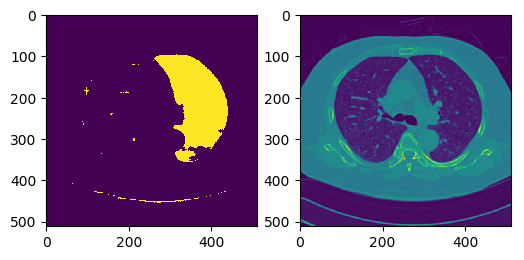

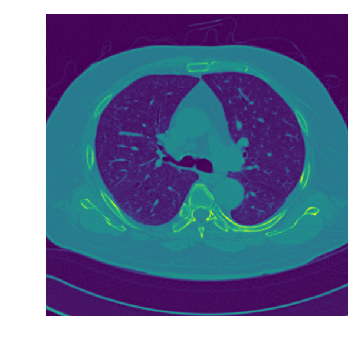

In [75]:
plt.figure(dpi=100)
plt.subplot(1,2,1)
plt.imshow(ex_nn_mask)
plt.subplot(1,2,2)
plt.imshow(ex_img)

plt.figure(dpi=100)
plt.imshow(ex_img)
plt.axis("off")

In [15]:
def normalize(img):
    img = np.clip(img, -800, 800)
    ma = np.max(img)
    mi = np.min(img)
    quo = ma - mi
    if quo == 0:
        return np.zeros(img.shape)
    return (img - mi)/(ma-mi)

1.0


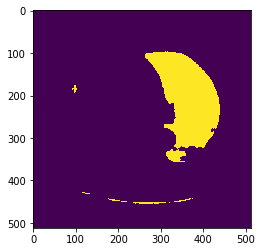

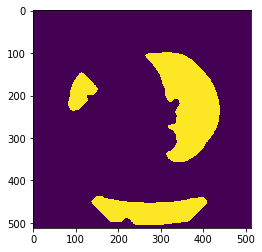

In [76]:
msnake = MSnake(normalize(ex_nn_mask), ex_img, iterations=50)
plt.figure()
plt.imshow(msnake.init_mask)

print(np.max(msnake.init_mask))

l_debug = msnake.evolve()

# for i in l_debug:
#     plt.figure()
#     plt.imshow(i)

plt.figure()
plt.imshow(msnake.mask)

In [166]:
# dice

PATH_MASK_H5 ="/mnt/dfs/xjyan/269-deeplevelset-segmentation/experiments/269_unet2/test/unet2_3_11_predictions.h5"
PATH_INPUT_H5 = "/mnt/dfs/xjyan/patches/269_test_patch_2class.h5"

msk_h5 = h5py.File(PATH_MASK_H5, "r")
input_h5 = h5py.File(PATH_INPUT_H5, "r")

l_dice = list()

for k, g in list(msk_h5.items()):
    nn_mask = g["binary_mask"][0,:,:,:] 
    mask = input_h5[k]["mask"][()]
    
    l_dice.append(np.sum(nn_mask * mask) * 2/(np.sum(nn_mask) + np.sum(mask)))

print(np.average(l_dice))

0.813556674977


In [203]:
# save gif
imageio.mimsave('/home/xjyan/Desktop/3_evo.gif', list(map(lambda t: stich(t[0], t[1]), zip(l_debug_1, l_debug_0))))

/home/xjyan/.conda/envs/py3/lib/python3.6/site-packages/imageio/core/util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


In [28]:
imageio.imsave('/home/xjyan/Desktop/input.png', ex_img)

/home/xjyan/.conda/envs/py3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from int16 to uint8, range [-1024, 1216]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


In [21]:
def stich(im1, im0):
    im = np.zeros(im1.shape)
    im[:, :256] = im1[:, :256]
    im[:, 256:] = im0[:, 256:]
    return im

In [77]:
# create demo data
f = h5py.File("../demo/demo_data.hdf5", "w")

for k, g in list(msk_h5.items()):
    ex_nn_mask = g["binary_mask"][0,:,:,0] 
    ex_img = input_h5[k]["ct_slice"][:,:]
    ex_mask = input_h5[k]["mask"][:,:,0]
    g = f.create_group(k)
    g.create_dataset("ct_slice", data=input_h5[k]["ct_slice"][()])
    g.create_dataset("mask", data=input_h5[k]["mask"][()])
    break

f.close()

In [61]:
f = h5py.File("../demo/demo_data.hdf5", "r")

len(f)

1

In [62]:
k = list(f.keys())[0]

print(f[k]["mask"].shape)
f.close()

(512, 512, 2)
